# House Prices Prediction using TensorFlow Decision Forests

## Import the library

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split



# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

## Load the dataset

In [2]:
train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 3 entries using the following code:

In [3]:
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


* There are 79 feature columns. Using these features your model has to predict the house sale price indicated by the label column named `SalePrice`.

We will drop the `Id` column as it is not necessary for model training.

In [4]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


We can inspect the types of feature columns using the following code:

## House Price Distribution

Now let us take a look at how the house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


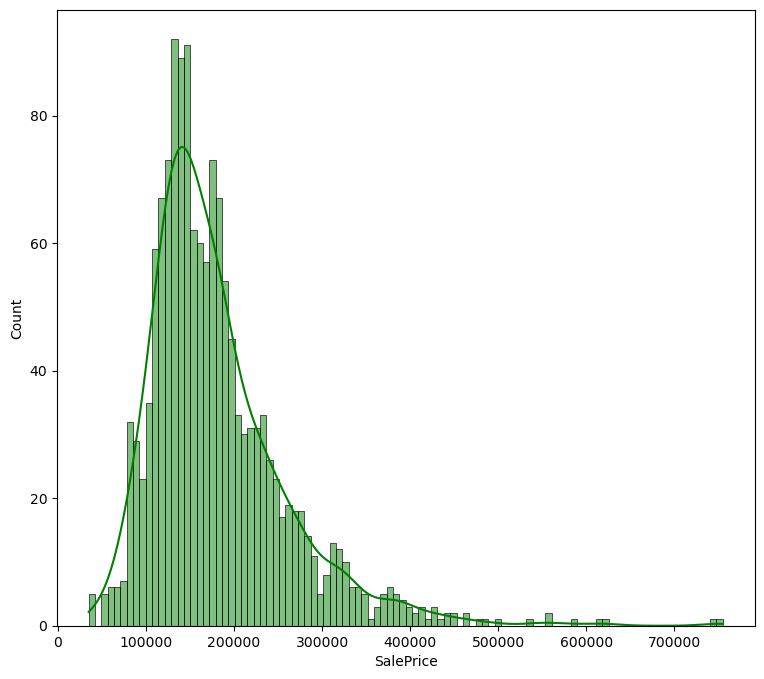

In [5]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset_df['SalePrice'], color='g', bins=100, kde=True)

plt.show()

## Numerical data distribution

We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [6]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Now let us plot the distribution for all the numerical features.

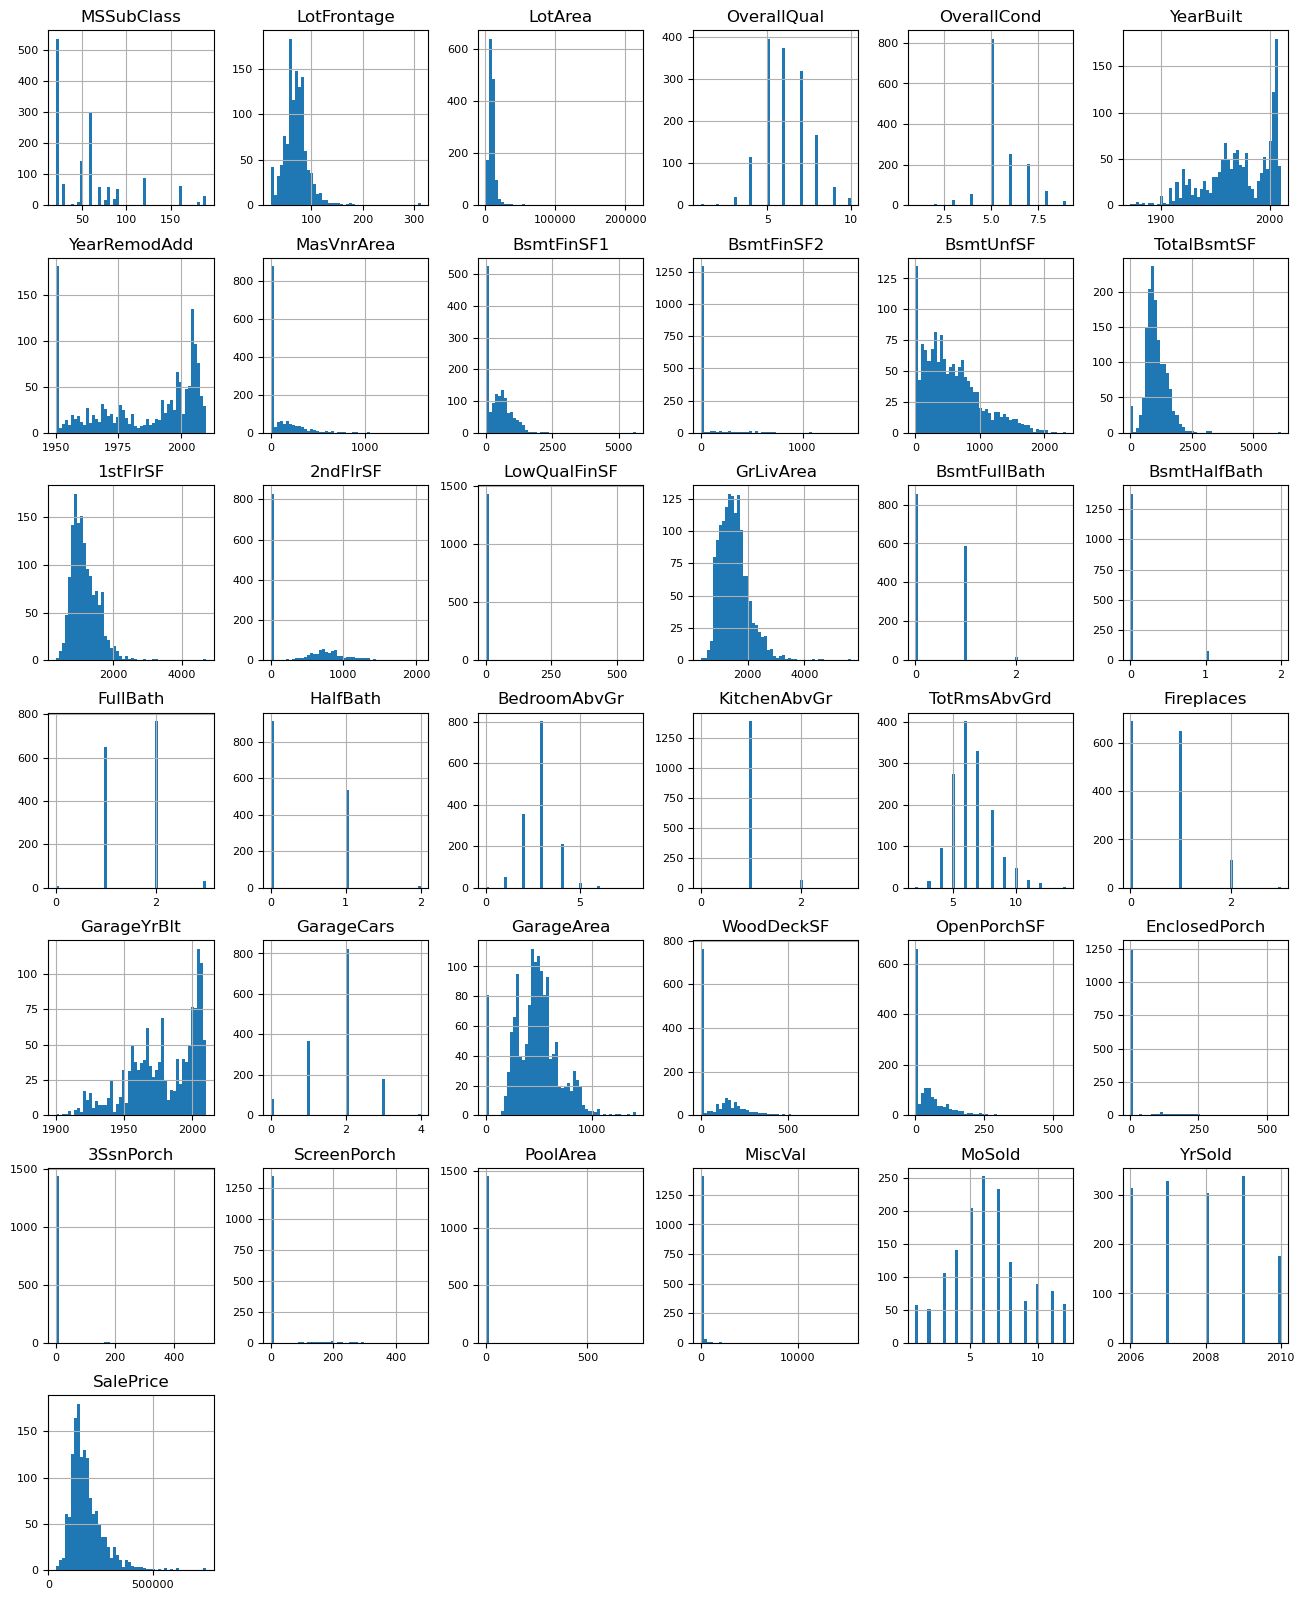

In [7]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Prepare the dataset

This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required. This is one advantage of tree-based models, making them a great entry point to Tensorflow and ML.

In [8]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1005 examples in training, 455 examples in testing.


In [9]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

# **Homework 7 (DS6030) - Qais Youssef**

In [10]:
seed = 42
train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
dataset_df = pd.read_csv(train_file_path)

# Drop the 'Id' column
dataset_df = dataset_df.drop('Id', axis=1)

# Apply log transformation to the target variable to stabilize variance
dataset_df['SalePrice'] = np.log1p(dataset_df['SalePrice'])


# Feature Engineering
def create_new_features(df):
    df = df.copy()
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['Age'] = df['YrSold'] - df['YearBuilt']
    df['TotalBath'] = (
        df['FullBath'] + df['HalfBath'] * 0.5 +
        df['BsmtFullBath'] + df['BsmtHalfBath'] * 0.5
    )
    return df

dataset_df = create_new_features(dataset_df)


# Split the dataset into training and validation sets
train_ds_pd, valid_ds_pd = train_test_split(
    dataset_df, test_size=0.3, random_state=seed)
print(f"{len(train_ds_pd)} examples in training, {len(valid_ds_pd)} examples in validation.")

# Handle missing values
numerical_cols = train_ds_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_ds_pd.select_dtypes(include=['object']).columns

# Fill missing values
train_ds_pd[numerical_cols] = train_ds_pd[numerical_cols].fillna(train_ds_pd[numerical_cols].mean())
valid_ds_pd[numerical_cols] = valid_ds_pd[numerical_cols].fillna(train_ds_pd[numerical_cols].mean())

train_ds_pd[categorical_cols] = train_ds_pd[categorical_cols].fillna(train_ds_pd[categorical_cols].mode().iloc[0])
valid_ds_pd[categorical_cols] = valid_ds_pd[categorical_cols].fillna(train_ds_pd[categorical_cols].mode().iloc[0])


# Convert the DataFrames to TensorFlow datasets
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    valid_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)

1022 examples in training, 438 examples in validation.


In [11]:
# Retrain Random Forest with new hyperparameters
rf_new = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION,
    num_trees=500,
    max_depth=8,    # Reduced from 12
    min_examples=5  # Increased from 2
)
rf_new.compile(metrics=["mse"])
rf_new.fit(x=train_ds)

# Evaluate the new Random Forest model
evaluation_rf = rf_new.evaluate(x=valid_ds, return_dict=True)
print("\nRandom Forest Evaluation on Validation Set:")
for name, value in evaluation_rf.items():
    print(f"{name}: {value:.6f}")

# Define and train Gradient Boosted Trees model
gbt_new = tfdf.keras.GradientBoostedTreesModel(
    task=tfdf.keras.Task.REGRESSION,
    num_trees=500,
    max_depth=6,
    shrinkage=0.005,
    subsample=0.9,
    l2_regularization=0.0
)
gbt_new.compile(metrics=["mse"])
gbt_new.fit(x=train_ds)

# Evaluate Gradient Boosted Trees model
evaluation_gbt = gbt_new.evaluate(x=valid_ds, return_dict=True)
print("\nGradient Boosted Trees Evaluation on Validation Set:")
for name, value in evaluation_gbt.items():
    print(f"{name}: {value:.6f}")

Use /tmp/tmp6ak2_2_2 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:07.536836. Found 1022 examples.
Training model...


[INFO 2024-11-09T04:32:29.712843581+00:00 kernel.cc:1214] Loading model from path /tmp/tmp6ak2_2_2/model/ with prefix 0763f88d56e048ab


Model trained in 0:00:01.993245
Compiling model...


[INFO 2024-11-09T04:32:30.012785089+00:00 decision_forest.cc:661] Model loaded with 500 root(s), 76914 node(s), and 76 input feature(s).
[INFO 2024-11-09T04:32:30.01287012+00:00 abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 2024-11-09T04:32:30.012942836+00:00 kernel.cc:1046] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.
1/1 [==============================] - 1s 813ms/step - loss: 0.0000e+00 - mse: 0.0173

Random Forest Evaluation on Validation Set:
loss: 0.000000
mse: 0.017327
Use /tmp/tmpf4ri4weh as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.204774. Found 1022 examples.
Training model...
Model trained in 0:00:11.781439
Compiling model...


[INFO 2024-11-09T04:32:47.241218244+00:00 kernel.cc:1214] Loading model from path /tmp/tmpf4ri4weh/model/ with prefix 482e5866e0c049c7
[INFO 2024-11-09T04:32:47.344623825+00:00 abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 2024-11-09T04:32:47.344713615+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 485ms/step - loss: 0.0000e+00 - mse: 0.0186

Gradient Boosted Trees Evaluation on Validation Set:
loss: 0.000000
mse: 0.018613


In [12]:
# Prepare the test dataset
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data['Id']
test_data = test_data.drop('Id', axis=1)

test_data = create_new_features(test_data)

# Handle missing values in the test set using training set statistics
numerical_cols = numerical_cols.drop('SalePrice', errors='ignore')  # Exclude target variable
test_data[numerical_cols] = test_data[numerical_cols].fillna(
    train_ds_pd[numerical_cols].mean())
test_data[categorical_cols] = test_data[categorical_cols].fillna(
    train_ds_pd[categorical_cols].mode().iloc[0])

# Convert test data to TensorFlow dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data, task=tfdf.keras.Task.REGRESSION)

# Generate predictions on test data
rf_preds_log = rf_new.predict(test_ds).squeeze()
gbt_preds_log = gbt_new.predict(test_ds).squeeze()

2/2 [==============================] - 1s 22ms/step


In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

seed = 42
# Function to create a new Random Forest model
def create_rf_model():
    rf_model = tfdf.keras.RandomForestModel(
        task=tfdf.keras.Task.REGRESSION,
        num_trees=500,
        max_depth=8,
        min_examples=5
    )
    rf_model.compile(metrics=["mse"])
    return rf_model

# Function to create a new Gradient Boosted Trees model
def create_gbt_model():
    gbt_model = tfdf.keras.GradientBoostedTreesModel(
        task=tfdf.keras.Task.REGRESSION,
        num_trees=500,
        max_depth=6,
        shrinkage=0.005,
        subsample=0.9,
        l2_regularization=0.0
    )
    gbt_model.compile(metrics=["mse"])
    return gbt_model
    
def get_oof_predictions(model_builder, X, y, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)
    oof_preds = np.zeros(len(X))
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train = y.iloc[train_index]

        # Convert to TensorFlow datasets
        train_ds_fold = tfdf.keras.pd_dataframe_to_tf_dataset(
            X_train.assign(SalePrice=y_train),
            label='SalePrice',
            task=tfdf.keras.Task.REGRESSION
        )
        val_ds_fold = tfdf.keras.pd_dataframe_to_tf_dataset(
            X_val,
            task=tfdf.keras.Task.REGRESSION
        )

        # Create a new model instance for each fold
        model = model_builder()

        # Train model on fold
        model.fit(x=train_ds_fold)

        # Predict on validation fold
        val_preds = model.predict(val_ds_fold).squeeze()
        oof_preds[val_index] = val_preds

    return oof_preds


# Prepare data for meta-learner
X = train_ds_pd.drop('SalePrice', axis=1)
y = train_ds_pd['SalePrice']

# Get OOF predictions for both models using the model builders
rf_oof_preds = get_oof_predictions(create_rf_model, X, y)
gbt_oof_preds = get_oof_predictions(create_gbt_model, X, y)

# Stack predictions
meta_X = np.vstack((rf_oof_preds, gbt_oof_preds)).T
meta_y = y.values

# Train meta-learner
meta_learner = Ridge()
meta_learner.fit(meta_X, meta_y)

# Prepare test predictions for meta-learner
meta_test_X = np.vstack((rf_preds_log, gbt_preds_log)).T

# Predict with meta-learner
final_preds_log = meta_learner.predict(meta_test_X)
final_preds = np.expm1(final_preds_log)

# Prepare submission
submission = pd.DataFrame({'Id': ids, 'SalePrice': final_preds})
submission.to_csv('submission_stacked.csv', index=False)

# Preview the submission file
print("\nStacked Model Submission Preview:")
print(submission.head())

Use /tmp/tmpj44uo63g as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.138420. Found 817 examples.
Training model...


[INFO 2024-11-09T04:32:54.025171359+00:00 kernel.cc:1214] Loading model from path /tmp/tmpj44uo63g/model/ with prefix 289a42f31f004157


Model trained in 0:00:01.578694
Compiling model...


[INFO 2024-11-09T04:32:54.288068494+00:00 decision_forest.cc:661] Model loaded with 500 root(s), 69052 node(s), and 75 input feature(s).
[INFO 2024-11-09T04:32:54.28814961+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 222ms/step
Use /tmp/tmppbia5rmv as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.139814. Found 817 examples.
Training model...


[INFO 2024-11-09T04:32:58.210165646+00:00 kernel.cc:1214] Loading model from path /tmp/tmppbia5rmv/model/ with prefix b5ed890f0de24ab4


Model trained in 0:00:01.613974
Compiling model...


[INFO 2024-11-09T04:32:58.50314495+00:00 decision_forest.cc:661] Model loaded with 500 root(s), 70532 node(s), and 74 input feature(s).
[INFO 2024-11-09T04:32:58.503205325+00:00 abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 2024-11-09T04:32:58.503243667+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 235ms/step
Use /tmp/tmp9hjnlb7_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.224686. Found 818 examples.
Training model...


[INFO 2024-11-09T04:33:02.603436339+00:00 kernel.cc:1214] Loading model from path /tmp/tmp9hjnlb7_/model/ with prefix eb3e65e0f1ec44c6


Model trained in 0:00:01.561712
Compiling model...


[INFO 2024-11-09T04:33:02.86701305+00:00 decision_forest.cc:661] Model loaded with 500 root(s), 69604 node(s), and 77 input feature(s).
[INFO 2024-11-09T04:33:02.867095639+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 218ms/step
Use /tmp/tmp47owv47c as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.229674. Found 818 examples.
Training model...


[INFO 2024-11-09T04:33:07.201518939+00:00 kernel.cc:1214] Loading model from path /tmp/tmp47owv47c/model/ with prefix 95598f55e713436c


Model trained in 0:00:01.548447
Compiling model...


[INFO 2024-11-09T04:33:07.454686253+00:00 decision_forest.cc:661] Model loaded with 500 root(s), 69852 node(s), and 77 input feature(s).
[INFO 2024-11-09T04:33:07.454782382+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 220ms/step
Use /tmp/tmpf43lfw55 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.151416. Found 818 examples.
Training model...


[INFO 2024-11-09T04:33:11.469362222+00:00 kernel.cc:1214] Loading model from path /tmp/tmpf43lfw55/model/ with prefix 22dd242be88842fb


Model trained in 0:00:01.574843
Compiling model...


[INFO 2024-11-09T04:33:11.734580434+00:00 decision_forest.cc:661] Model loaded with 500 root(s), 70136 node(s), and 79 input feature(s).
[INFO 2024-11-09T04:33:11.734676425+00:00 abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 2024-11-09T04:33:11.734726602+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 215ms/step
Use /tmp/tmprdvnb42p as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.148452. Found 817 examples.
Training model...
Model trained in 0:00:10.895112
Compiling model...


[INFO 2024-11-09T04:33:25.14931714+00:00 kernel.cc:1214] Loading model from path /tmp/tmprdvnb42p/model/ with prefix 58eedc35f2504fe7
[INFO 2024-11-09T04:33:25.24790468+00:00 abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 2024-11-09T04:33:25.247972011+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 221ms/step
Use /tmp/tmp3hr4zz0g as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.136670. Found 817 examples.
Training model...
Model trained in 0:00:11.080151
Compiling model...


[INFO 2024-11-09T04:33:38.844950515+00:00 kernel.cc:1214] Loading model from path /tmp/tmp3hr4zz0g/model/ with prefix 9623f97a9fec4809
[INFO 2024-11-09T04:33:38.946688585+00:00 abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 2024-11-09T04:33:38.946761711+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 234ms/step
Use /tmp/tmpdfi9xt5k as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.155368. Found 818 examples.
Training model...
Model trained in 0:00:11.017046
Compiling model...


[INFO 2024-11-09T04:33:52.519019338+00:00 kernel.cc:1214] Loading model from path /tmp/tmpdfi9xt5k/model/ with prefix 30bcb75ba915462e
[INFO 2024-11-09T04:33:52.623864217+00:00 abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 2024-11-09T04:33:52.623948517+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 218ms/step
Use /tmp/tmpg38g3x78 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.164990. Found 818 examples.
Training model...
Model trained in 0:00:10.993335
Compiling model...


[INFO 2024-11-09T04:34:06.149281663+00:00 kernel.cc:1214] Loading model from path /tmp/tmpg38g3x78/model/ with prefix 1124ef7bfd044725
[INFO 2024-11-09T04:34:06.248993873+00:00 abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 2024-11-09T04:34:06.249065075+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 231ms/step
Use /tmp/tmpvhvikm1h as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.169864. Found 818 examples.
Training model...
Model trained in 0:00:10.632589
Compiling model...


[INFO 2024-11-09T04:34:19.418019687+00:00 kernel.cc:1214] Loading model from path /tmp/tmpvhvikm1h/model/ with prefix e76b552b68ae4a13
[INFO 2024-11-09T04:34:19.516219666+00:00 abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 2024-11-09T04:34:19.516298786+00:00 kernel.cc:1046] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 229ms/step

Stacked Model Submission Preview:
     Id      SalePrice
0  1461  120368.575634
1  1462  154020.465479
2  1463  187352.338512
3  1464  185570.887170
4  1465  200958.823323
